In [5]:
import os
import string
import re
from pathlib import Path

In [6]:
current_dir = Path(os.getcwd()).absolute()
results_dir = current_dir.joinpath('results')
results_dir.mkdir(parents=True, exist_ok=True)
data_dir = current_dir.joinpath('data')
data_dir.mkdir(parents=True, exist_ok=True)
external_data_dir = current_dir.parent.parent.parent.joinpath('data')
imdb_dir = external_data_dir.joinpath(r'external/imdb/aclImdb')




print(current_dir)
print(results_dir)
print(data_dir)
print(imdb_dir)

/home/jovyan/dsc650/dsc650/assignments/assignment10
/home/jovyan/dsc650/dsc650/assignments/assignment10/results
/home/jovyan/dsc650/dsc650/assignments/assignment10/data
/home/jovyan/dsc650/data/external/imdb/aclImdb


#### Assignment 10.1.a  

Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.

In [8]:
file_name = "sample.txt"
file_path = f"{data_dir}/{file_name}"
file_path

'/home/jovyan/dsc650/dsc650/assignments/assignment10/data/sample.txt'

In [9]:
def tokenize(sentence):
    tokens = []
    words = sentence.split()
    # tokenize the sentence
    for word in words:
        # allowing only alphabets
        word = re.sub("[^a-zA-Z]", "", word)
        tokens.append(word)
    return tokens

In [10]:
def call_tokenize():
	with open(f'{file_path}','r') as f:
		for line in f:
			line = line.lower()
			# print(line, end = 'XX')
			return tokenize(line)

call_tokenize()

['it',
 'was',
 '',
 'minutes',
 'after',
 'midnight',
 'the',
 'dog',
 'was',
 'lying',
 'on',
 'the',
 'grass',
 'in',
 'the',
 'middle',
 'of',
 'the',
 'lawn',
 'in',
 'front',
 'of',
 'mrs',
 'shears',
 'house',
 'its',
 'eyes',
 'were',
 'closed',
 'it',
 'looked',
 'as',
 'if',
 'it',
 'was',
 'running',
 'on',
 'its',
 'side',
 'the',
 'way',
 'dogs',
 'run',
 'when',
 'they',
 'think',
 'they',
 'are',
 'chasing',
 'a',
 'cat',
 'in',
 'a',
 'dream',
 'but',
 'the',
 'dog',
 'was',
 'not',
 'running',
 'or',
 'asleep',
 'the',
 'dog',
 'was',
 'dead',
 'there',
 'was',
 'a',
 'garden',
 'fork',
 'sticking',
 'out',
 'of',
 'the',
 'dog',
 'the',
 'points',
 'of',
 'the',
 'fork',
 'must',
 'have',
 'gone',
 'all',
 'the',
 'way',
 'through',
 'the',
 'dog',
 'and',
 'into',
 'the',
 'ground',
 'because',
 'the',
 'fork',
 'had',
 'not',
 'fallen',
 'over',
 'i',
 'decided',
 'that',
 'the',
 'dog',
 'was',
 'probably',
 'killed',
 'with',
 'the',
 'fork',
 'because',
 'i',
 'c

#### Assignment 10.1.b

Implement an `ngram` function that splits tokens into N-grams. 

In [11]:
def ngram(tokens, n):
    # ngrams = []
    # Create ngrams
    # return ngrams
    return print(list(zip(*[tokens[i:] for i in range(n)])))

In [12]:
def call_ngram():
	with open(f'{file_path}','r') as f:
		for line in f:
			line = line.lower()
			# print(line, end = 'XX')
			return ngram(tokenize(line),3)

call_ngram()

[('it', 'was', ''), ('was', '', 'minutes'), ('', 'minutes', 'after'), ('minutes', 'after', 'midnight'), ('after', 'midnight', 'the'), ('midnight', 'the', 'dog'), ('the', 'dog', 'was'), ('dog', 'was', 'lying'), ('was', 'lying', 'on'), ('lying', 'on', 'the'), ('on', 'the', 'grass'), ('the', 'grass', 'in'), ('grass', 'in', 'the'), ('in', 'the', 'middle'), ('the', 'middle', 'of'), ('middle', 'of', 'the'), ('of', 'the', 'lawn'), ('the', 'lawn', 'in'), ('lawn', 'in', 'front'), ('in', 'front', 'of'), ('front', 'of', 'mrs'), ('of', 'mrs', 'shears'), ('mrs', 'shears', 'house'), ('shears', 'house', 'its'), ('house', 'its', 'eyes'), ('its', 'eyes', 'were'), ('eyes', 'were', 'closed'), ('were', 'closed', 'it'), ('closed', 'it', 'looked'), ('it', 'looked', 'as'), ('looked', 'as', 'if'), ('as', 'if', 'it'), ('if', 'it', 'was'), ('it', 'was', 'running'), ('was', 'running', 'on'), ('running', 'on', 'its'), ('on', 'its', 'side'), ('its', 'side', 'the'), ('side', 'the', 'way'), ('the', 'way', 'dogs'), (

#### Assignment 10.1.c

Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens.

In [13]:
def one_hot_encode(tokens, num_words):
    token_index = {}
    results = ''
    return results

#### 10.2

Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [37]:
# Processing the labels of the raw IMDB data
def load_raw_imdb(source_dir):
    labels = []
    texts = []

    for label_type in ['neg','pos']:
        dir_name = source_dir.joinpath(label_type) 
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt':
                f = open(dir_name.joinpath(fname))
                texts.append(f.read())
                f.close()
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)
    
    labels = np.asarray(labels)
    return texts,labels

In [42]:
# Plotting the results from the training and validation set

import matplotlib.pyplot as plt

def plot_train_val(acc,val_acc,loss, val_loss):

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    if len(val_acc) == 0:
        plt.title('Training Accuracy')
    else:
        plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')        
        
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Training loss')
    if len(val_loss) == 0:
        plt.title('Training loss')
    else:
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')        
        
    plt.legend()
    plt.show()

In [38]:
# Tokenizing the text of the raw IMDB data

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


train_dir = imdb_dir.joinpath('train')
(texts,labels) = load_raw_imdb(train_dir)
    
# cuts off reviews after 100 words
maxlen = 100
# trains 200 samples
training_samples = 200
#validates on 10,000 samples
validation_samples = 10000
# considers only the top 10,000 words in the dataset
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels_train)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splits the data into a training set and a validation set, but first shuffles the data,
# because you’re starting with data in which samples are ordered (all negative first, then all positive)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [39]:
# Parsing the GloVe word-embeddings file
glove_dir = '/home/jovyan/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# Preparing the GloVe word-embeddings matrix

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
# Training the same model without pretrained word embeddings
# Model Definition

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Found 400000 word vectors.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Training and Evaluating the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))


Epoch 1/10
7/7 [==============================] - 1s 120ms/step - loss: 0.6961 - acc: 0.4650 - val_loss: 0.6934 - val_acc: 0.5052
Epoch 2/10
7/7 [==============================] - 1s 109ms/step - loss: 0.5193 - acc: 1.0000 - val_loss: 0.6926 - val_acc: 0.5208
Epoch 3/10
7/7 [==============================] - 1s 109ms/step - loss: 0.2966 - acc: 0.9950 - val_loss: 0.6966 - val_acc: 0.5208
Epoch 4/10
7/7 [==============================] - 1s 108ms/step - loss: 0.1241 - acc: 1.0000 - val_loss: 0.7018 - val_acc: 0.5152
Epoch 5/10
7/7 [==============================] - 1s 109ms/step - loss: 0.0563 - acc: 1.0000 - val_loss: 0.7050 - val_acc: 0.5165
Epoch 6/10
7/7 [==============================] - 1s 109ms/step - loss: 0.0288 - acc: 1.0000 - val_loss: 0.7096 - val_acc: 0.5224
Epoch 7/10
7/7 [==============================] - 1s 105ms/step - loss: 0.0159 - acc: 1.0000 - val_loss: 0.7123 - val_acc: 0.5236
Epoch 8/10
7/7 [==============================] - 1s 106ms/step - loss: 0.0092 - acc: 1.00

#### The accuracy = 1.0

In [41]:
#saving the model
model.save_weights('glove_model.h5')

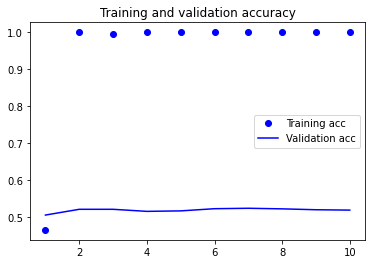

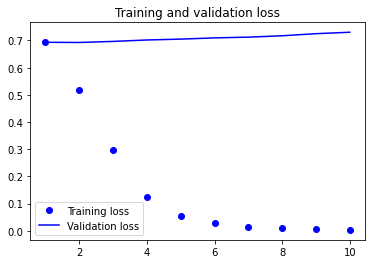

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot_train_val(acc,val_acc,loss,val_loss)

In [44]:
# Tokenizing the data for the test set
test_dir = imdb_dir.joinpath('test')
(texts,labels) = load_raw_imdb(test_dir)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)
print('Shape of data tensor:', x_test.shape)
print('Shape of label tensor:', y_test.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [45]:
# Load and evaluate the model on the test set
model.load_weights('glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7339 - acc: 0.5234


[0.7338595986366272, 0.523360013961792]

In [22]:
#### The accuracy is 53.68 / 52.34

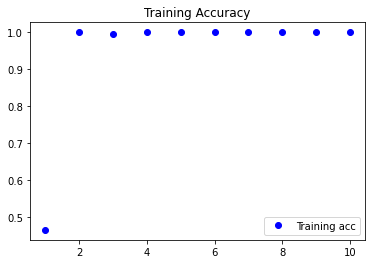

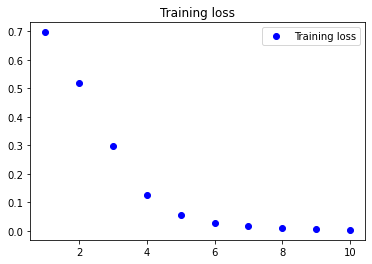

In [46]:
# Plotting the results from the test set

acc = history.history['acc']
loss = history.history['loss']
val_acc = []
val_loss = []

plot_train_val(acc,val_acc,loss,val_loss)

#### 10.3
Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [47]:
# Processing the labels of the raw IMDB data
train_dir = imdb_dir.joinpath('train')
print('Loading Training data...')
 
(input_train, y_train) = load_raw_imdb(train_dir)
print(len(input_train), 'train sequences')

test_dir = imdb_dir.joinpath('test')
print('Loading Test data...')
 
(input_test, y_test) = load_raw_imdb(test_dir)
print(len(input_test), 'test sequences')

Loading Training data...
25000 train sequences
Loading Test data...
25000 test sequences


In [48]:
# Using the same train and test data set from the above dataset
# Preparing the dataset differently
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

# Number of words to consider in the features
max_features = 10000
# Cuts off texts after this many words 
# (among the max_features most common words)
maxlen = 500
batch_size = 32

train_dir = imdb_dir.joinpath('train')
test_dir = imdb_dir.joinpath('test')
print('Loading data...')
(input_train, y_train) =  load_raw_imdb(train_dir)
(input_test, y_test) = load_raw_imdb(test_dir)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

tokenizer = Tokenizer(num_words=max_features)

print('Pad sequences (samples x time)')
tokenizer.fit_on_texts(input_train)
sequences = tokenizer.texts_to_sequences(input_train)
input_train = sequence.pad_sequences(sequences, maxlen=maxlen)

tokenizer.fit_on_texts(input_test)
sequences = tokenizer.texts_to_sequences(input_test)
input_test = sequence.pad_sequences(sequences, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [49]:
# Using LSTM layers in keras
# Model summary

from keras.layers import Embedding
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Training and evaluating the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 68s 432ms/step - loss: 0.5186 - acc: 0.7462 - val_loss: 0.4311 - val_acc: 0.9212
Epoch 2/10
157/157 [==============================] - 67s 425ms/step - loss: 0.3129 - acc: 0.8781 - val_loss: 0.3734 - val_acc: 0.8722
Epoch 3/10
157/157 [==============================] - 67s 428ms/step - loss: 0.2408 - acc: 0.9090 - val_loss: 0.3961 - val_acc: 0.8648
Epoch 4/10
157/157 [==============================] - 67s 427ms/step - loss: 0.2024 - acc: 0.9255 - val_loss: 0.4462 - val_acc: 0.8452
Epoch 5/10
157/157 [==============================] - 68s 433ms/step - loss: 0.1777 - acc: 0.9372 - val_loss: 0.1800 - val_acc: 0.9322
Epoch 6/10
157/157 [==============================] - 69s 438ms/step - loss: 0.1578 - acc: 0.9453 - val_loss: 0.5617 - val_acc: 0.7794
Epoch 7/10
157/157 [==============================] - 67s 426ms/step - loss: 0.1406 - acc: 0.9518 - val_loss: 0.4340 - val_acc: 0.8546
Epoch 8/10
157/157 [==============================] - 6

#### Accuracy = 96.63 / 96.55

In [51]:
#saving the model
model.save_weights('LSTM_model.h5')

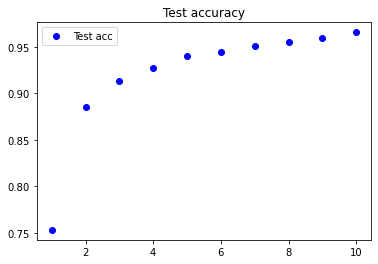

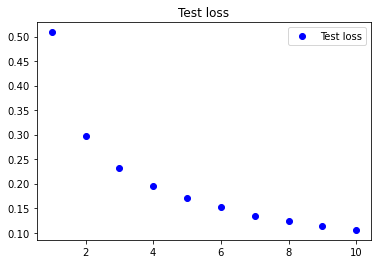

In [30]:
# Plotting the results from the test set

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plot_train_val(acc,val_acc,loss,val_loss)

#### 10.4
Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.